<a href="https://colab.research.google.com/github/bingxiaochen/ST-554-Project1/blob/main/Task2/Project1_Task2_Hui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Hui Fang

Collaborators: Bing Chen, Cole Hammett

Purpose: ST 554 Project 1-Task 2

Date: 2/10/2026

# Introduction
Air pollutants are considered responsible for a range of respiratory diseases, and some compounds (e.g., benzene) are known to increase risks of cancer with prolonged exposure (De Vito et al., 2008). To explore how low-cost chemical sensors behave in real urban conditions, this project analyzes the [air quality dataset](https://archive.ics.uci.edu/dataset/360/air+quality) from the UCI machine learning repository . The dataset contains 9358 hourly measurements collected from March 2004 to February 2025 by an array of five metal-oxide chemical sensors deployed at street level in a heavily polluted Italian city. The dataset contains hourly concentrations for CO, Non Metanic Hydrocarbons (NMHC), benzene, Total Nitrogen Oxides (NOx), and Nitrogen Dioxide (NO2), and Ozone (O3), along with meteorological variables including temperature, relative humidity (RH%), and absolute humidity (AH).

The purpose of the project is to conduct an exploratory data analysis to investigate how sensor signals and environmental conditions related to the “true” benzene concentration, as well as to explore sensor behavior, cross-sensitivities, and drift phenomena documented in the original study. Details of the variables are available on the UCI air quality repository.


# Read in and clean up data
To read in the dataset, we first need to install the ucimlrepo package via the following code.

In [1]:
!pip install ucimlrepo # install ucimlrepo package

Import modules for this work

In [23]:
import pandas as pd                # import pandas module
import numpy as np                 # import numpy module
import matplotlib.pyplot as plt    # import plot module

Following the UCI Air Quality instructions, the dataset is provided in an object named **`X`** for simplicity.

In [22]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
air_quality = fetch_ucirepo(id=360)

# data (as pandas dataframes)
X = air_quality.data.features

Check dataset structure and variable information.

In [21]:
X.head()     # check the dataset structure

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [20]:
X.info()     # check the variable info in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


- Clean up the data

Since we do not need the “true” reference values for CO, NMHC, NOx, or NO₂, we can remove those columns from the dataset and rename C6H6(GT), PT08.S1(CO), PT08.S2(NMHC), PT08.S3(NOx), PT08.S4(NO₂), and PT08.S5(O₃) to more intuitive and easy-to-understand variable names. We stored the dataframe to a new one named **X_df**.

In [24]:
# drop variables not to be analyzed and rename variables for simplicity
X_df = X.drop(columns = ["CO(GT)", "NMHC(GT)", "NOx(GT)", "NO2(GT)"]) \
    .rename(columns = {"C6H6(GT)" : "Ben",           # rename variables
                        "PT08.S1(CO)": "CO",
                        "PT08.S2(NMHC)" : "NMHC",
                        "PT08.S3(NOx)" : "NOx",
                        "PT08.S4(NO2)" : "NO2",
                        "PT08.S5(O3)" : "O3" })
X_df.head()                                          # check the new data frame

,Date,Time,CO,Ben,NMHC,NOx,NO2,O3,T,RH,AH
0,3/10/2004,18:00:00,1360,11.9,1046,1056,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,1292,9.4,955,1174,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,1402,9.0,939,1140,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,1376,9.2,948,1092,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1272,6.5,836,1205,1490,1110,11.2,59.6,0.7888


- Check missing values and replace them with 'nan'

    Based on information from the UCI Air Quality website, missing values in the dataset are coded as –200. Therefore, we need to remove all rows containing this value.

In [25]:
X_df = X_df.replace(-200, np.nan)   # replaced missing values with 'NAN'
X_df.isna().sum()                   # count how many missing values in each column

,0
Date,0
Time,0
CO,366
Ben,366
NMHC,366
NOx,366
NO2,366
O3,366
T,366
RH,366


Since there are equal numbers of missing values in the data frame, so we will remove those missing values for further analysis.

- Drop the missing values and conduct a quick summary of the variables

In [ ]:
X_df = X_df.dropna()     # drop the missing values represented as 'NaN'
X_df.isna().sum()        # Check if there are still missing values in the data frame
X_df.describe().round(3) # Get the summary table to understand the numberic varviables

,CO,Ben,NMHC,NOx,NO2,O3,T,RH,AH
count,8991.000,8991.000,8991.000,8991.000,8991.000,8991.000,8991.000,8991.000,8991.000
mean,1099.833,10.083,939.153,835.494,1456.265,1022.906,18.318,49.234,1.026
std,217.080,7.450,266.831,256.817,346.207,398.484,8.832,17.317,0.404
min,647.000,0.100,383.000,322.000,551.000,221.000,-1.900,9.200,0.185
25%,937.000,4.400,734.500,658.000,1227.000,731.500,11.800,35.800,0.737
50%,1063.000,8.200,909.000,806.000,1463.000,963.000,17.800,49.600,0.995
75%,1231.000,14.000,1116.000,969.500,1674.000,1273.500,24.400,62.500,1.314
max,2040.000,63.700,2214.000,2683.000,2775.000,2523.000,44.600,88.700,2.231


Across all variables, the dataset contains 8,991 complete observations for each vaiable after removing rows with missing values. The pollutant sensor readings (CO, Ben, NMHC, NOx, NO₂, O₃) show substantial variability, with wide ranges between their minimum and maximum values, indicating fluctuating air-quality conditions over time. All pollutant variables exhibit right-skewed distributions, as their upper quartiles and maximum values are noticeably higher than their medians.

Temperature (T) ranges from slightly below freezing (-1.9°C) to warm conditions (44.6°C), reflecting seasonal variation. Relative humidity (RH) spans from very dry (9.2%) to highly humid (88.7%), while absolute humidity (AH) shows a narrower range but still varies meaningfully across the year. Overall, the summary statistics suggest the dataset with strong temporal and environmental variability, suitable for exploring sensor behavior and pollutant relationships.

# Summary of the benzene, C6H6(GT), at different levels/combinations of other variables

## Numeric summary


### Extract different time frames for analysis

The dataset contains separate Date and Time columns, but to summarize benzene concentration across different temporal patterns (such as season, month, weekday, week of the year, and hour of the day), we first need to combine them into a single datetime column. The following code extracts these different time-based features for further analysis.

In [29]:
X_df["datetime"] = pd.to_datetime(X_df["Date"] + " " + X_df["Time"])  # combine Date and Time columns into a single datetime column

# create a dictionary for seasons, spring:
# 3-5, summer: 6-8, fall:9-11, winter:12-2
season_map = {3: "Spring", 4: "Spring", 5: "Spring",
              6: "Summer", 7: "Summer", 8: "Summer",
              9: "Fall", 10: "Fall", 11: "Fall",
             12: "Winter", 1: "Winter", 2: "Winter"}

X_df["season"] = pd.Categorical(X_df["datetime"] \
                                .dt.month.map(season_map),
                                categories=["Spring", "Summer",
                                "Fall", "Winter"], ordered = True)     # Convert season to an ordered categorical variable


month_order = ["January", "February", "March", "April",                # create a chronological month order
               "May", "June", "July", "August",
                "September", "October", "November", "December"]


X_df["month"] = pd.Categorical(                                        # Convert month to an ordered categorical variable
    X_df["datetime"].dt.month_name(),
    categories = month_order,
    ordered=True )


weekday_order = ["Monday", "Tuesday", "Wednesday",                     # Define conventional weekday order (Monday → Sunday)
                 "Thursday", "Friday", "Saturday", "Sunday"]

X_df["weekday"] = pd.Categorical(X_df["datetime"].dt.day_name(),       # Convert weekday_name to an ordered categorical variable
    categories = weekday_order,
    ordered = True)

X_df["week"] = X_df["datetime"].dt.isocalendar().week                  #  Extract ISO week number

X_df["hour"] = X_df["datetime"].dt.hour                                # Extract hour of day from the datatime column


In [28]:
X_df.head() # check the new dataset after adding time frames

,Date,Time,CO,Ben,NMHC,NOx,NO2,O3,T,RH,AH,datetime,season,month,weekday,week,hour
0,3/10/2004,18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00,Spring,March,Wednesday,11,18
1,3/10/2004,19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00,Spring,March,Wednesday,11,19
2,3/10/2004,20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00,Spring,March,Wednesday,11,20
3,3/10/2004,21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00,Spring,March,Wednesday,11,21
4,3/10/2004,22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00,Spring,March,Wednesday,11,22


- Create subsets of the data based on different time frames

In [40]:
# produce subset of the data grouped by different time frames
ben_mon_stat = X_df.groupby("month", observed=True)["Ben"] \
    .agg(["count", "mean", "median", "std", "min", "max"])              # Group Ben by month
ben_week_stat = X_df.groupby("week")["Ben"] \
    .agg(["count", "mean", "median", "std", "min", "max"])              # Group Ben by week
ben_weekday_stat = X_df.groupby("weekday", observed=True)["Ben"] \
    .agg(["count", "mean", "median", "std", "min", "max"])              # Group Ben by weekday
ben_hour_stat = X_df.groupby("hour")["Ben"] \
    .agg(["count", "mean", "median", "std", "min", "max"])              # Group Ben by hours of a day
# T_hour_stat = X_df.groupby("hour")["T"] \
#     .agg(["count", "mean", "median", "std", "min", "max"])              # Group temperature by hours of a day
# RH_hour_stat = X_df.groupby("hour")["RH"] \
#     .agg(["count", "mean", "median", "std", "min", "max"])              # Group RH by hours of a day
ben_season_stat = X_df.groupby("season", observed=True)["Ben"] \
    .agg(["count", "mean", "median", "std", "min", "max"])              # group Ben by season

### Summarize benzend concentration grouped by month

In [41]:
ben_mon_stat.round(3)

,count,mean,median,std,min,max
month,,,,,,
January,683,9.025,6.90,7.210,0.1,43.0
February,596,7.501,6.05,5.704,0.2,33.9
March,1253,9.219,7.50,6.861,0.2,39.2
April,780,9.708,7.75,7.462,0.5,40.3
May,730,10.219,9.10,6.732,0.5,40.2
June,682,10.596,9.50,6.580,0.5,36.9
July,743,10.599,9.90,6.231,1.3,37.3
August,695,6.994,6.30,3.865,1.0,30.7
September,702,11.555,9.70,8.008,0.9,41.2


Benzene concentrations show a clear seasonal pattern: levels are lowest in winter, rise through spring and early summer, and peak in autumn. August is an exception, with both mean concentration and variability dropping sharply compared with surrounding months. November records the highest concentrations, including the overall maximum of 63.7 µg/m³. Overall, the data indicate that benzene levels generally increase during warmer months and reach their highest in early autumn before declining toward winter.

### Summary of benzene concentration by weekday

In [42]:
ben_weekday_stat.round(3)

,count,mean,median,std,min,max
weekday,,,,,,
Monday,1303,9.956,7.8,8.069,0.2,63.7
Tuesday,1276,11.680,10.1,8.693,0.1,52.1
Wednesday,1251,11.400,9.5,7.987,0.1,47.7
Thursday,1274,11.527,9.9,7.950,0.3,47.5
Friday,1242,11.730,10.4,7.626,0.4,45.2
Saturday,1328,8.507,7.8,4.699,0.5,26.8
Sunday,1317,6.051,5.2,3.895,0.2,30.3


Benzene levels vary noticeably across the week. Concentrations are highest on weekdays, especially Tuesday through Friday, where mean values reach 11.4–11.7 µg/m³ and variability is relatively large. In contrast, weekend levels drop sharply: Saturday averages 8.5 µg/m³, and Sunday shows the lowest mean at 6.1 µg/m³ with the smallest fluctuations. This pattern likely reflects reduced vehicle activity on weekends.

### Summary of benzene concentration across hours of a day

In [43]:
ben_hour_stat.round(3)

,count,mean,median,std,min,max
hour,,,,,,
0,372,7.684,7.00,3.922,1.0,30.3
1,374,5.992,5.50,3.171,0.6,18.5
2,375,4.379,3.80,2.561,0.4,16.7
3,376,3.379,2.90,2.228,0.2,16.0
4,377,2.917,2.60,1.991,0.2,16.9
5,377,3.068,2.80,1.935,0.1,15.0
6,376,4.756,4.30,2.769,0.1,13.1
7,376,10.399,7.70,7.823,0.2,31.5
8,376,15.894,15.10,9.829,0.3,41.2


Benzene concentrations follow a strong daily cycle. Levels are lowest during the early morning hours (2:00-5:00), where mean concentrations fall between 2.9 and 4.4 µg/m³ with very small variability. Concentrations begin rising after 6:00 and increase sharply during the morning rush period. The highest levels occur between 8:00 and 10:00, with means ranging from 12.2 to 15.9 µg/m³ and large fluctuations, including several extreme maximum values. A secondary rise appears around 17:00-19:00, consistent with evening traffic, before decreasing again late at night.

Overall, benzene levels are lowest overnight, peak during morning traffic hours, and show a smaller secondary peak in the early evening.

### Summary of benzene concentrations by temperature category

In [44]:
# Divides temerature into four intervals and label them 'cold', 'cool', 'warm', 'Hot'
# create a new column called T_cat for the four temperature categories
X_df["T_cat"] = pd.cut(X_df["T"], bins = [-2, 10, 20, 30, 45], labels = ['Cold', 'Cool', 'Warm', 'Hot'])
X_df["T_cat"].value_counts()

# group benzene concentrations based on temperature categories
X_df.groupby("T_cat", observed = True)["Ben"].agg(["count", "mean", "median", "std", "min", "max"]).round(3)

,count,mean,median,std,min,max
T_cat,,,,,,
Cold,1696,7.514,5.4,6.652,0.1,63.7
Cool,3584,9.732,7.7,7.522,0.2,50.8
Warm,2773,11.663,9.8,7.896,1.0,52.1
Hot,938,11.398,10.9,5.485,1.8,32.3


We divided temperature into four categories to examine how benzene concentrations vary under different thermal conditions: **Cold** (-2 to 10 °C), **Cool** (10 - 20 °C), **Warm** (20 - 30 °C), and **Hot** (30 - 45 °C). Benzene levels generally increase with temperature. The **Cold** category has the lowest mean concentration (7.51 µg/m³), while concentrations rise in the **Cool** and **Warm** categories, with **Warm** showing the highest mean level (11.66 µg/m³) and the greatest variability. The Hot category maintains similarly high concentrations (11.40 µg/m³) but with lower variability, suggesting more stable conditions at higher temperatures.

## Graphic summary

In [47]:
# create a function to plot line graph
def plot_line(df, timeframe):
    """
    Plot mean, median, and standard deviation of Benzene (Ben)
    across a specified timeframe (e.g., month, hour, weekday)
    """
    df = df[["mean", "median", "std"]]                                # select mean, median, and std to plot ,
    df.plot(kind = "line", marker = "o", figsize = (8, 5))            # define plot type, marker, and size

    plt.xlabel(f"{timeframe}")                                        # label x-axis
    plt.ylabel("Benzene Concentration")                               # label y-axis
    plt.title(f"Benzene Concentration Across {timeframe}")            # plot title
    plt.tight_layout()
    return None


### Benzene concentration across different time frames

#### Benzene concentration across seasons

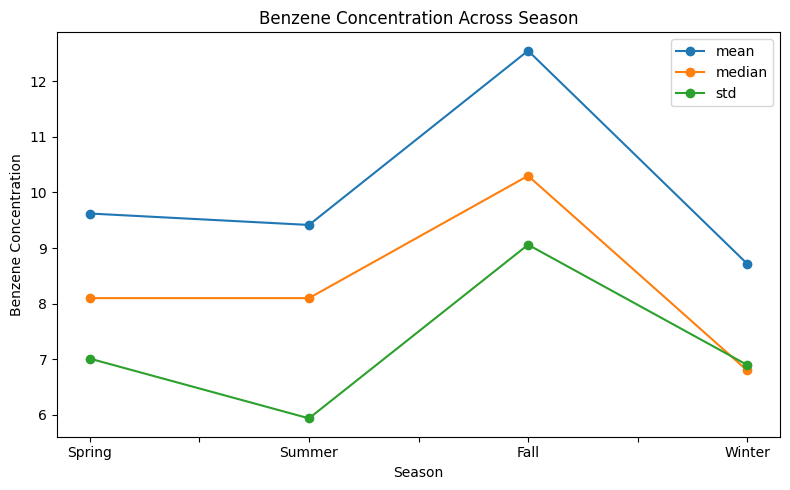

In [48]:
plot_line(ben_season_stat, "Season")

The figure shows a clear seasonal pattern in benzene concentration. Levels are relatively low in spring and summer, then rise sharply to their highest values in fall, before dropping again to lower levels in winter. The mean, median, and standard deviation all follow this same pattern. Overall, the plot suggests that benzene levels peak in fall and remain lowest during winter.

 - Benzene concentration across months

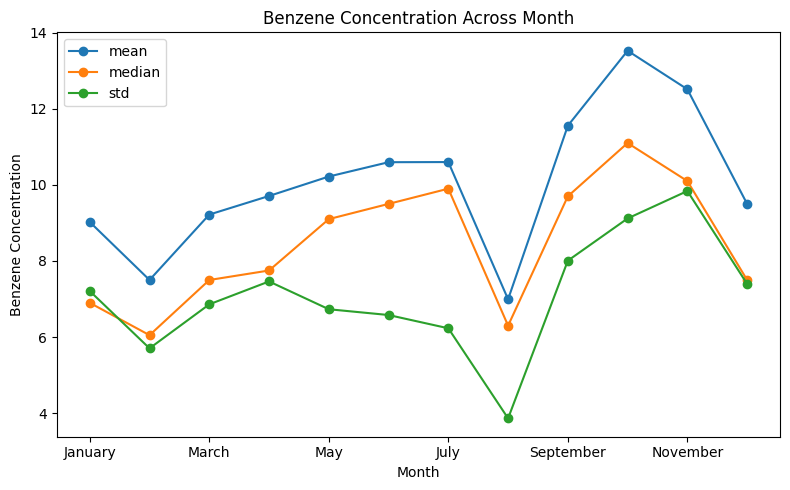

In [49]:
plot_line(ben_mon_stat, "Month")

The figure shows a clear monthly pattern in benzene concentration. Concentrations are low in January and February, rise steadily through spring and early summer, and reach their highest values in October. August is an exception, with both the mean concentration and variability dropping noticeably compared with other months. Overall, the plot indicates that benzene levels generally increase during warmer months and peak in early autumn before declining toward winter.

#### Benzene concentration across weekdays
  

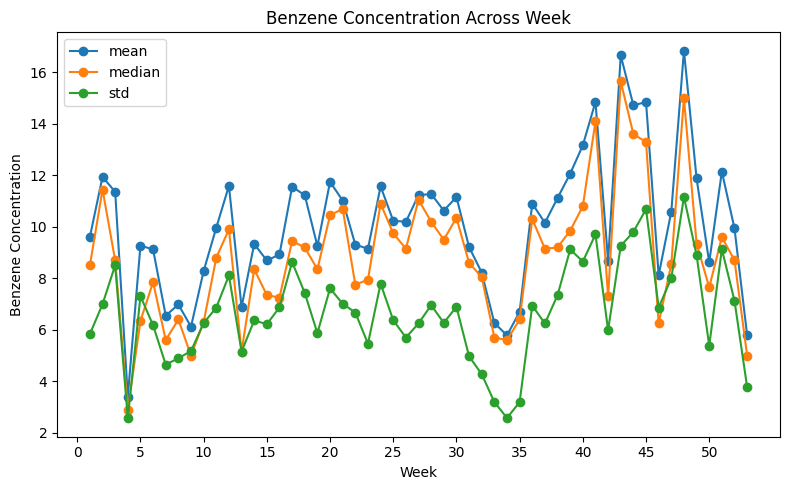

In [50]:
plot_line(ben_week_stat, "Week")
plt.xticks(range(0, 51, 5))         # define x-axis marker
plt.show()

The figure shows noticeable week-to-week variation in benzene concentration. Levels remain fairly steady through most of the year but rise sharply in late autumn, with clear peaks around weeks 44-48. The mean, median, and standard deviation all follow this pattern, indicating both higher concentrations and greater variability during this period. Overall, benzene levels stay moderate for most weeks and increase substantially toward the end of the year before dropping again.

#### Benzene concentration across weekdays
    

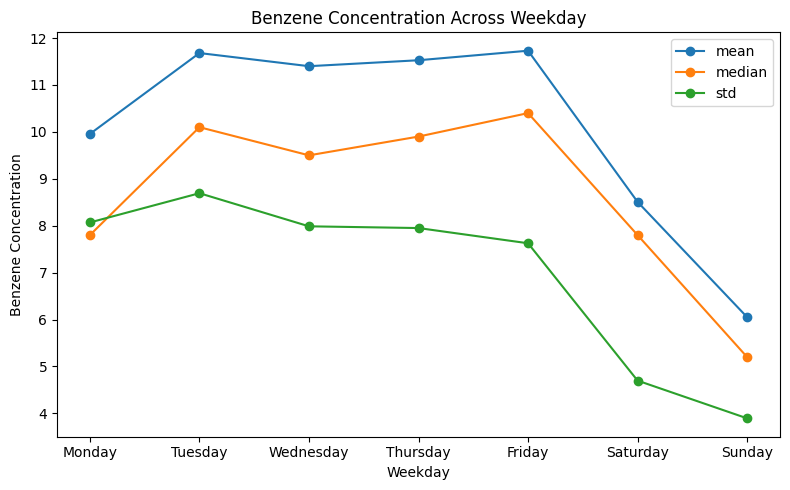

In [51]:
plot_line(ben_weekday_stat, "Weekday")

Benzene levels vary noticeably across the weekdays. Concentrations are highest from Tuesday through Friday, with relatively large variability. In contrast, levels drop sharply on the weekend, with Saturday and Sunday showing the lowest means and the smallest fluctuations. This pattern likely reflects reduced vehicle activity on weekends.

#### Benzene concentration dynamic across hours   

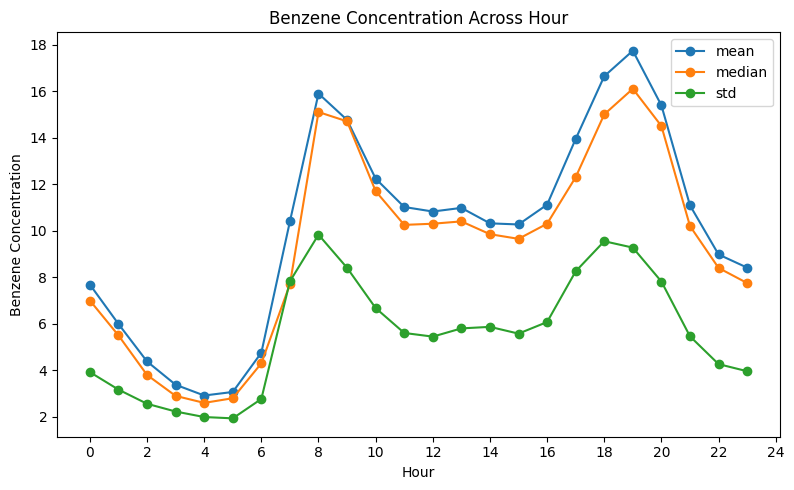

In [52]:
plot_line(ben_hour_stat, "Hour")
plt.xticks(range(0, 25, 2))
plt.show()

Benzene concentrations follow a clear daily cycle. Levels are lowest during the early morning hours (around 2:00-5:00), with very little variability. Concentrations begin to rise after 6:00 and increase sharply during the morning rush, reaching their highest values between 8:00 and 9:00, where fluctuations are also largest. A smaller secondary peak appears between 17:00 and 19:00, consistent with evening traffic, before concentrations decline again later at night.

### Investigation of the distribution of pollutants

We developed a plotting function that produces a histogram for any selected variable, with an optional user-defined bin size. The function takes three inputs — the dataframe (X_df), the variable name, and the desired number of bins — and returns a histogram showing the frequency distribution of the variable across its valure (e.g., concentration) range.

In [ ]:
# create a function to plot histogram
def plot_hist(df, var, bins = None):
    """
    Fuction to plot histgram showing the distribution of
    selected variable with an optional user-defined bin size.
    """
    df[var].plot.hist(bins = bins)
    if bins != None:
        bins = bins
    else:
         bins = None
    plt.xlabel(f"Value of {var}")
    plt.title(f"Histogram of {var} for air quality")
    plt.show()
    return None

#### Distribution of benzene concentration

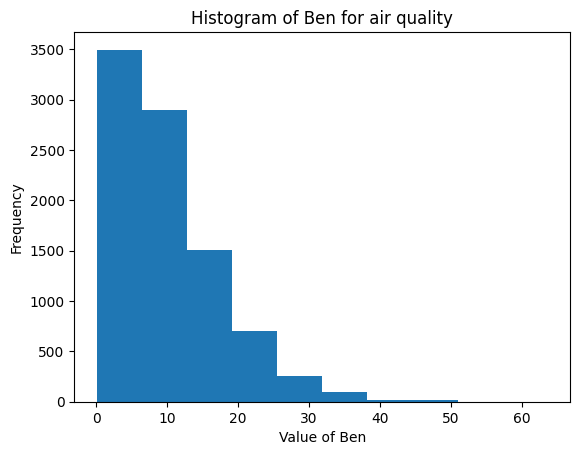

In [ ]:
plot_hist(X_df, "Ben", bins = 10)

The histogram shows that benzene concentrations are heavily skewed toward low values. Most measurements fall between 0 and 10, with frequency dropping steadily as concentrations increase. High benzene values are much less common, indicating that extreme concentrations occur only occasionally.

#### Distribution of CO

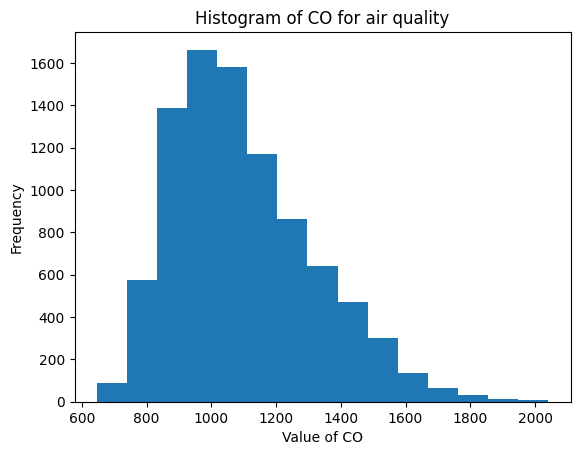

In [ ]:
plot_hist(X_df, "CO", bins = 15 )

The histogram shows that CO concentrations cluster strongly around lower values, with the highest frequencies near 1000. The distribution is right-skewed, meaning higher CO values occur less often.

#### Distribution of NMHC

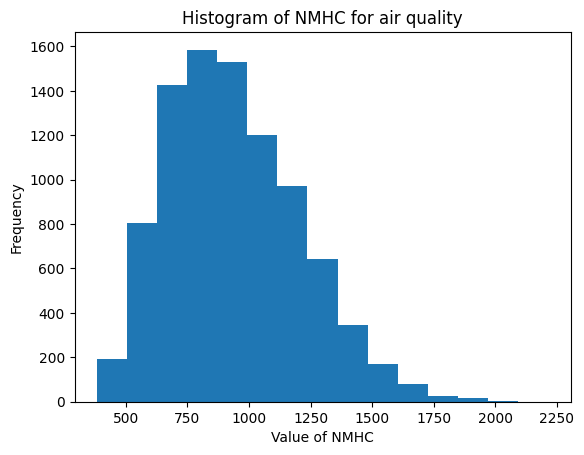

In [ ]:
plot_hist(X_df, "NMHC", bins = 15)

The histogram shows that NMHC values are concentrated at the lower end of the range, with the highest frequencies around 900-1000. The distribution is slightly right-skewed, meaning higher NMHC values occur less often.

- Distribution of NOx concentration

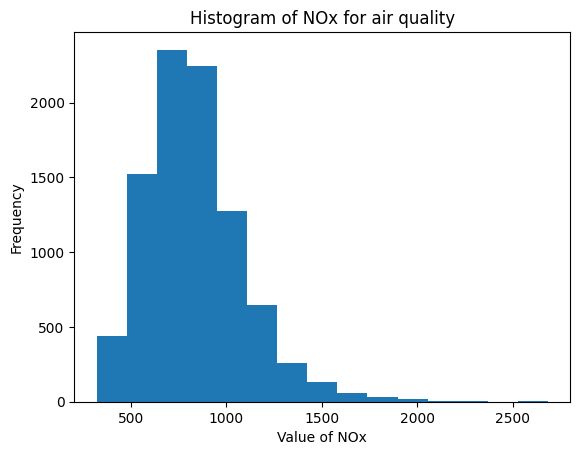

In [ ]:
plot_hist(X_df, "NOx", bins = 15)

The histogram shows that NOx values are concentrated in the lower range, with the highest frequencies around 500-1000. The distribution is slightly right-skewed meaning very high concentrations are relatively rare.

#### Distribution of NO₂

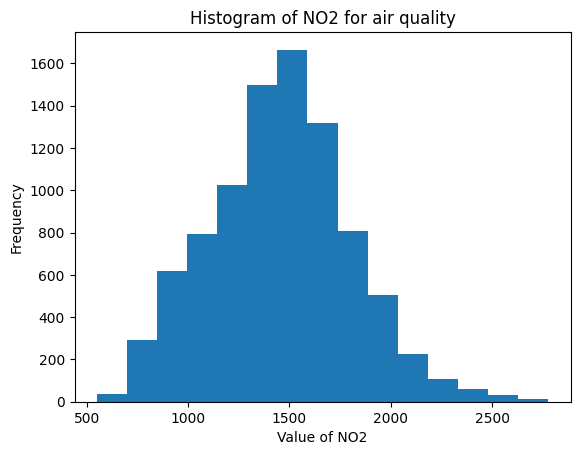

In [ ]:
plot_hist(X_df, "NO2", bins = 15)

The histogram shows that NO₂ values cluster around the middle of the range, with the highest frequencies near 1500. The distribution is roughly bell‑shaped, indicating that most NO₂ measurements fall within a central band, while very low and very high values occur less often.

#### Distribution of O₃

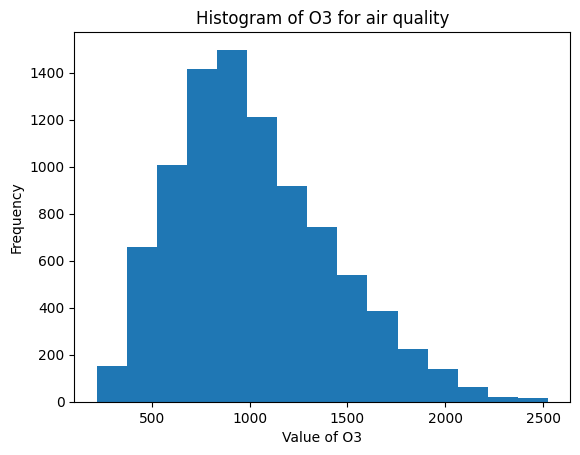

In [ ]:
plot_hist(X_df, "O3", bins = 15)

The histogram shows that O₃ values cluster in the lower-to-mid range, with the highest frequencies roughly between 700 and 1100. The distribution is right-skewed, meaning higher ozone values occur less often. Overall, most O₃ measurements fall within a moderate band, while very high concentrations are relatively uncommon.

## Measures of Linear Relationships among Factors


### Correlation matrix

Correlation is typically expressed using the correlation coefficient, *`r`*. A positive value of *`r`* indicates a positive relationship, and a negative value indicates a negative relationship. Here, we present the Pearson correlation coefficients among pollutants and environmental factors.

In [ ]:
X_df[["CO",	"Ben",	"NMHC",	"NOx",	"NO2",	"O3",	"T",	"RH",	"AH"]].corr().round(3) # produce correlation matrix

,CO,Ben,NMHC,NOx,NO2,O3,T,RH,AH
CO,1.000,0.884,0.893,-0.772,0.683,0.899,0.049,0.115,0.135
Ben,0.884,1.000,0.982,-0.736,0.766,0.866,0.199,-0.062,0.168
NMHC,0.893,0.982,1.000,-0.797,0.777,0.881,0.241,-0.090,0.187
NOx,-0.772,-0.736,-0.797,1.000,-0.538,-0.797,-0.145,-0.057,-0.232
NO2,0.683,0.766,0.777,-0.538,1.000,0.591,0.561,-0.032,0.630
O3,0.899,0.866,0.881,-0.797,0.591,1.000,-0.027,0.125,0.071
T,0.049,0.199,0.241,-0.145,0.561,-0.027,1.000,-0.579,0.656
RH,0.115,-0.062,-0.090,-0.057,-0.032,0.125,-0.579,1.000,0.168
AH,0.135,0.168,0.187,-0.232,0.630,0.071,0.656,0.168,1.000


Benzene shows strong positive correlations with CO (r = 0.884), NMHC (r = 0.982), and O₃ (r = 0.866), and a moderate positive correlation with NO₂ (r = 0.766). It also has weak positive associations with temperature (r = 0.199) and absolute humidity (r = 0.168), a very weak negative correlation with relative humidity (r = -0.062), and a negative relationship with NOₓ (r = -0.736). NOₓ exhibits negative correlations with all other variables, with the strong negative relationships occurring with CO (r = -0.772), NMHC (r = -0.797), and O₃ (r = -0.797). NMHC is strongly positively correlated with CO (r = 0.893), benzene (r = 0.982), NO₂ (r = 0.777), and O₃ (r = 0.881), and positively correlated with temperature (r = 0.241) and absolute humidity (r = 0.187), while showing negative correlations only with NOₓ (r = -0.797) and relative humidity. Among meteorological variables, temperature is positively correlated with absolute humidity (r = 0.656) and negatively correlated with relative humidity (r = -0.579). Overall, the correlation matrix indicates that CO, NMHC, benzene, and O₃ form a tightly linked pollutant cluster with highly similar temporal behavior.

### Scatter plots

Scatter plots is a way to show the relationship between two numberic variables. We first created a function to plot two variables of interest.

In [38]:
# Define a function to create a scatter plot to show relationship of two numeric variables
def plot_scatter(df, x, y):
    """
    Fuction to plot scatter plot showing the relationship
    between two selected variables.
    """
    plt.scatter(df[x], df[y],                               # define x and y
                marker = "o",                               # define marker
                s = 20,                                     # define marker size
                facecolors = 'none',                        # no fill to markers
                edgecolors ="blue")                         # marker outline color
    plt.xlabel(f"{x} Value")                        # label x-axis
    plt.ylabel(f"{y} Concentration")                        # lable y-axis
    plt.title(f"{x} Value vs. {y} Concentration")   # plot title
    plt.show()
    return None

- Scatter plot for CO vs benzene

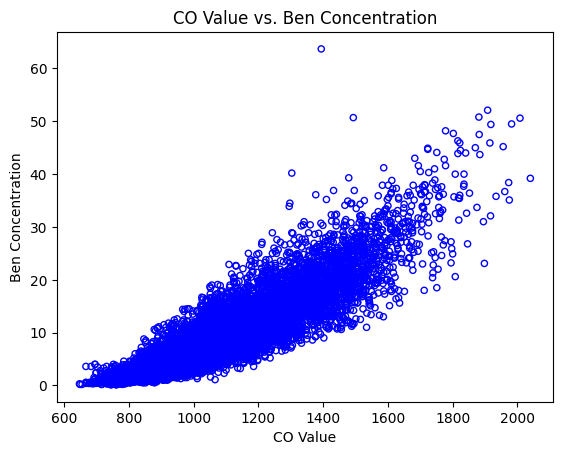

In [39]:
plot_scatter(X_df, "CO", "Ben")

The scatter plot shows a positive relationship between CO sensor readings and benzene concentrations. As CO values increase, benzene levels also tend to rise, and the spread of points widens at higher CO levels, suggesting greater variability when pollution is higher. Overall, the pattern indicates that CO and benzene often increase together, likely reflecting shared emission sources such as traffic.

- Relationship between NMHC and benzene

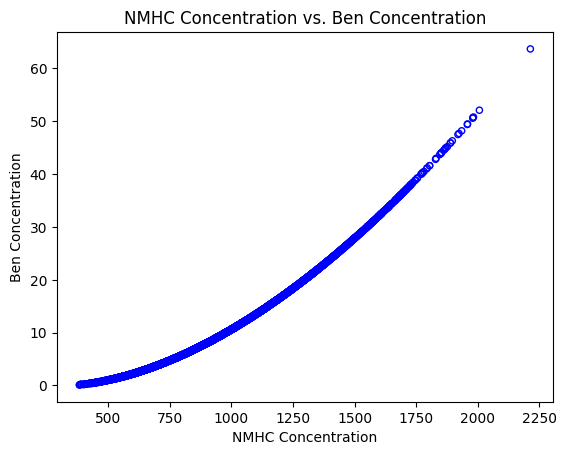

In [ ]:
plot_scatter(X_df, "NMHC", "Ben")

The scatter plot shows a strong positive relationship between NMHC and benzene concentrations. As NMHC values increase, benzene levels rise as well, and the pattern becomes steeper at higher NMHC levels, suggesting a nonlinear or accelerating association. This indicates that the two pollutants likely share common emission sources and tend to increase together under more polluted conditions.

- The relationship between Ben and O3

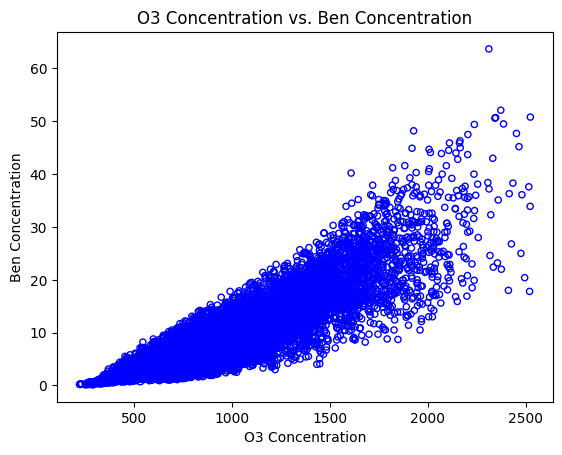

In [ ]:
plot_scatter(X_df, "O3", "Ben")

The scatter plot shows a positive association between O₃ and benzene concentrations. As O₃ values increase, benzene levels also tend to rise, though the relationship is more diffuse than with CO or NMHC. The upward trend suggests that higher ozone conditions often coincide with higher benzene, likely reflecting shared atmospheric or emission patterns.

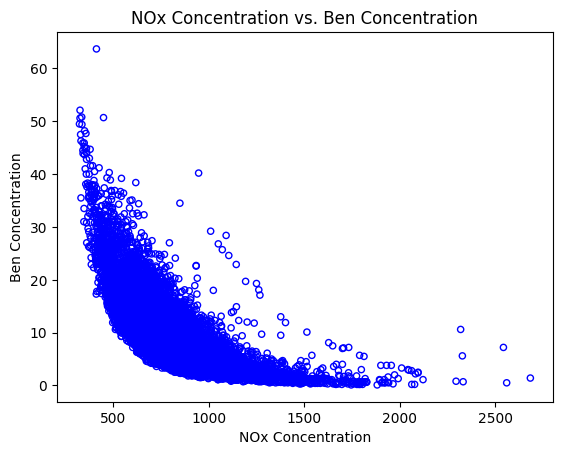

In [ ]:
plot_scatter(X_df, "NOx", "Ben")

The scatter plot shows a clear negative relationship between NOx and benzene. As NOx increases, benzene consistently decreases, with the contrast becoming stronger at higher NOx levels. This inverse pattern aligns with the correlation analysis.

### Scatter-plot matrix

array([[<Axes: xlabel='CO', ylabel='CO'>,
        <Axes: xlabel='Ben', ylabel='CO'>,
        <Axes: xlabel='NMHC', ylabel='CO'>,
        <Axes: xlabel='O3', ylabel='CO'>],
       [<Axes: xlabel='CO', ylabel='Ben'>,
        <Axes: xlabel='Ben', ylabel='Ben'>,
        <Axes: xlabel='NMHC', ylabel='Ben'>,
        <Axes: xlabel='O3', ylabel='Ben'>],
       [<Axes: xlabel='CO', ylabel='NMHC'>,
        <Axes: xlabel='Ben', ylabel='NMHC'>,
        <Axes: xlabel='NMHC', ylabel='NMHC'>,
        <Axes: xlabel='O3', ylabel='NMHC'>],
       [<Axes: xlabel='CO', ylabel='O3'>,
        <Axes: xlabel='Ben', ylabel='O3'>,
        <Axes: xlabel='NMHC', ylabel='O3'>,
        <Axes: xlabel='O3', ylabel='O3'>]], dtype=object)

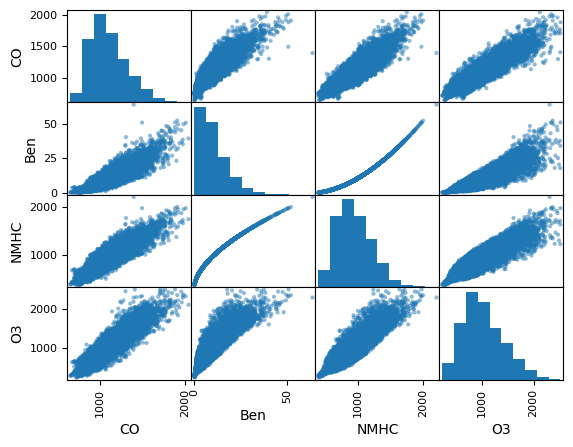

In [ ]:
# creates a scatter‑plot matrix for the four pollutant cluster
pd.plotting.scatter_matrix(X_df[["CO", "Ben", "NMHC", "O3"]])

The pair plot shows consistent positive relationships among CO, benzene, NMHC, and O₃, with each pair displaying an upward trend. The diagonal histograms confirm that all four pollutants are right-skewed, with most values clustered at the lower end of their ranges. Overall, the matrix highlights shared emission patterns across pollutants and reinforces the correlations observed in the numerical analysis.

# Overall summary

Across all temporal scales, benzene shows clear and consistent patterns:

1. Concentrations are lowest in winter and early mornings, rise through the warmer months, and peak in early autumn, with pronounced increases during morning and evening traffic hours and on weekdays compared with weekends.

2. The pollutant distributions and scatter-plot matrix show that benzene, CO, NMHC, NOx, NO₂, and O₃ are all right-skewed, with high concentrations occurring less frequently.

3. The scatter plots and correlation matrix indicate that benzene is positively associated with CO, NMHC, and O₃, while NOx shows a clear negative relationship—patterns consistent with the correlation analysis and reflective of shared emission sources for some pollutants and contrasting atmospheric behavior for others.

Overall, the exploratory analysis highlights strong seasonal, daily, and weekly cycles in benzene levels and distinct relationships between benzene and other key air pollutants.